In [30]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys
sys.path.append(os.path.dirname(os.path.abspath('')))
from data.data_loading import load_data

In [31]:
project_root_dir = os.path.dirname(os.getcwd())
data_dirname = os.path.join(project_root_dir, 'challenge_data')
# read data
X_train, y_train, X_test = load_data(data_dirname)

In [32]:
X_train.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

In [33]:
X = X_train
y = y_train["TARGET"]

columns = ['DE_CONSUMPTION', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT']

F = X[['DAY_ID', 'COUNTRY'] + columns]
F = F.set_index(['DAY_ID', 'COUNTRY']).unstack(-1)
F = F.fillna(method="ffill").fillna(0)
F = F.stack()
F = F.reindex(X.set_index(['DAY_ID', 'COUNTRY']).index)
F = F.reset_index()
F[columns].head()

,DE_CONSUMPTION,FR_DE_EXCHANGE,DE_NET_EXPORT
0,0.210099,0.606523,0.195696
1,-0.022399,0.022063,-0.573520
2,1.395035,-1.021305,-0.622021
3,-0.983324,0.839586,-0.270870
4,0.143807,0.924990,-0.995317


In [34]:
X.fillna(0, inplace = True)

In [35]:
F.sort_values("DAY_ID")

,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_DE_EXCHANGE,DE_NET_EXPORT
742,0,FR,0.048418,0.079296,0.000000
1211,1,FR,0.966997,-0.331356,0.405549
1408,2,FR,-0.068972,1.102015,-1.080403
1468,2,DE,-0.068972,1.102015,-1.080403
329,3,FR,-0.134670,1.051716,-1.881881
...,...,...,...,...,...
1007,1212,FR,-0.046100,0.270515,-0.137917
986,1212,DE,-0.046100,0.270515,-0.137917
1465,1213,DE,1.407027,0.456126,0.333142
873,1213,FR,1.407027,0.456126,0.333142


In [36]:
X = X_train
y = y_train["TARGET"]

F = X.drop("ID", axis=1)
F = F.set_index(['DAY_ID', 'COUNTRY']).unstack(-1)
F = F.fillna(method="ffill").fillna(0)
F = F.stack()
F = F.reindex(X.set_index(['DAY_ID', 'COUNTRY']).index)
F["ID"] = X.set_index(['DAY_ID', 'COUNTRY']).ID
F = F.reset_index()
F = F.drop(['ID', 'DAY_ID', 'COUNTRY'], axis = 1)
F = (F - F.mean(axis=0)) / F.std(axis=0)
F

,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,-0.322749,-0.443339,-0.481632,0.481632,0.255622,0.725519,-0.255622,-0.725519,-0.399276,-0.671577,...,-0.324629,-0.144028,-0.564258,-0.873501,-0.390170,-1.145161,-0.073389,0.255896,0.060770,-0.075508
1,-0.668003,-1.070104,0.125757,-0.125757,-0.368076,-1.010642,0.368076,1.010642,-0.712695,0.035213,...,-1.148586,-1.264549,-0.774544,1.388093,0.698126,0.455294,1.877321,-0.653341,-0.014132,-0.519628
2,1.436853,2.174872,1.210058,-1.210058,-0.420821,-1.535907,0.420821,1.535907,1.848074,1.905375,...,2.343973,-0.467312,-0.325570,0.321220,0.364459,0.718195,0.110126,0.435291,0.659294,0.113270
3,-2.094953,-0.902253,-0.723838,0.723838,-0.038947,0.602111,0.038947,-0.602111,-0.344489,-0.221026,...,-0.918513,-1.132871,-0.516342,-0.588583,-0.344240,0.363418,-0.437978,0.777510,-0.346174,0.904255
4,-0.421190,-0.649629,-0.812593,0.812593,0.255622,1.008705,-0.255622,-1.008705,-0.637512,-0.701468,...,-0.415674,-0.531088,-0.434801,-1.164209,-1.103316,0.643248,0.742973,0.170330,1.416915,2.306400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1.636090,1.226028,-1.779428,1.779428,0.017833,1.446723,-0.017833,-1.446723,1.211453,1.095698,...,0.739912,0.037207,-0.017816,-0.100305,-0.112939,-0.009409,-0.008109,0.745930,0.732981,1.128559
1490,1.768814,1.929141,0.784063,-0.784063,0.744073,-0.078927,-0.744073,0.078927,1.402133,1.283266,...,2.030448,0.037207,-0.017816,-0.100305,-0.112939,-0.009409,-0.008109,0.796622,-0.142587,0.251082
1491,0.636992,0.554116,-0.117127,0.117127,-1.409921,-0.723833,1.409921,0.723833,1.562080,1.623144,...,0.571007,0.255414,0.379734,-0.681647,0.762352,0.262918,0.406112,-1.066732,-0.289750,-0.012159
1492,0.197870,-0.352282,-0.714125,0.714125,-0.075906,1.218056,0.075906,-1.218056,-0.922938,0.523688,...,-0.034779,-0.679441,-0.401165,-1.050725,-1.583419,1.281936,1.370213,0.824114,-5.275969,-0.841346


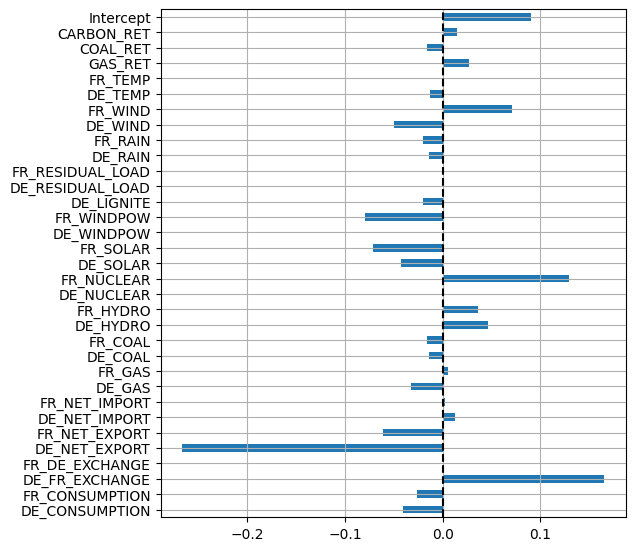

In [37]:
from models.linreg import *

lr = LassoRegressionModel(alpha=0.001)
lr.fit(F, y_train.TARGET)
fig, ax = lr.plot_coef()

In [46]:
from scripts.cross_validation import *


ridge_pen = [10**(i/2) for i in range(-6, 10)]
ridge_models = [RidgeRegressionModel(alpha=alpha, name=f"RidgeReg_{alpha:0.3g}") for alpha in ridge_pen]

lasso_pen = [10**(i/2) for i in range(-14, 3)]
lasso_models = [LassoRegressionModel(alpha=alpha, name=f"LassoReg_{alpha:0.3g}") for alpha in lasso_pen]


models = [LinearRegressionModel()] + ridge_models + lasso_models

CV = KFoldCrossValidation(models, k = 5)
CV.run(X_train, y_train.TARGET)

TRAIN: [ 299  300  301 ... 1491 1492 1493] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

AttributeError: 'LinearRegressionModel' object has no attribute 'process'

In [78]:
CV.scores

model,LinReg,RidgeReg_0.001,RidgeReg_0.00316,RidgeReg_0.01,RidgeReg_0.0316,RidgeReg_0.1,RidgeReg_0.316,RidgeReg_1,RidgeReg_3.16,RidgeReg_10,...,LassoReg_0.000316,LassoReg_0.001,LassoReg_0.00316,LassoReg_0.01,LassoReg_0.0316,LassoReg_0.1,LassoReg_0.316,LassoReg_1,LassoReg_3.16,LassoReg_10
fold_id,,,,,,,,,,,,,,,,,,,,,
fold_0,0.273662,0.273720,0.273556,0.273541,0.273557,0.273317,0.273170,0.273652,0.273922,0.277012,...,0.274267,0.277808,0.287940,0.300744,0.282682,0.256784,NaN,NaN,NaN,NaN
fold_1,0.161146,0.161217,0.161122,0.161208,0.162385,0.164742,0.166630,0.169690,0.169140,0.172902,...,0.171065,0.179212,0.181036,0.173447,0.152427,0.110223,NaN,NaN,NaN,NaN
fold_2,0.191949,0.191876,0.191854,0.192058,0.191652,0.192201,0.193655,0.193451,0.195411,0.196626,...,0.194625,0.196656,0.196760,0.182704,0.168432,0.170434,NaN,NaN,NaN,NaN
fold_3,0.225801,0.225822,0.225792,0.225608,0.225252,0.225165,0.224378,0.223615,0.223542,0.224473,...,0.226031,0.224962,0.228310,0.216906,0.201239,0.183504,NaN,NaN,NaN,NaN
fold_4,0.129930,0.129930,0.130218,0.130538,0.129940,0.129571,0.131247,0.133528,0.133742,0.135632,...,0.133888,0.135172,0.135844,0.142747,0.157056,0.144816,NaN,NaN,NaN,NaN


In [79]:
CV.scores.mean()

model
LinReg               0.196497
RidgeReg_0.001       0.196513
RidgeReg_0.00316     0.196508
RidgeReg_0.01        0.196591
RidgeReg_0.0316      0.196557
RidgeReg_0.1         0.196999
RidgeReg_0.316       0.197816
RidgeReg_1           0.198787
RidgeReg_3.16        0.199151
RidgeReg_10          0.201329
RidgeReg_31.6        0.203437
RidgeReg_100         0.207203
RidgeReg_316         0.209191
RidgeReg_1e+03       0.203151
RidgeReg_3.16e+03    0.194998
RidgeReg_1e+04       0.189826
RidgeReg_3.16e+04    0.186709
LassoReg_1e-07       0.197246
LassoReg_3.16e-07    0.197254
LassoReg_1e-06       0.197221
LassoReg_3.16e-06    0.197375
LassoReg_1e-05       0.197484
LassoReg_3.16e-05    0.197796
LassoReg_0.0001      0.198747
LassoReg_0.000316    0.199975
LassoReg_0.001       0.202762
LassoReg_0.00316     0.205978
LassoReg_0.01        0.203310
LassoReg_0.0316      0.192367
LassoReg_0.1         0.173152
LassoReg_0.316            NaN
LassoReg_1                NaN
LassoReg_3.16             NaN
Lass

<AxesSubplot: xlabel='model'>

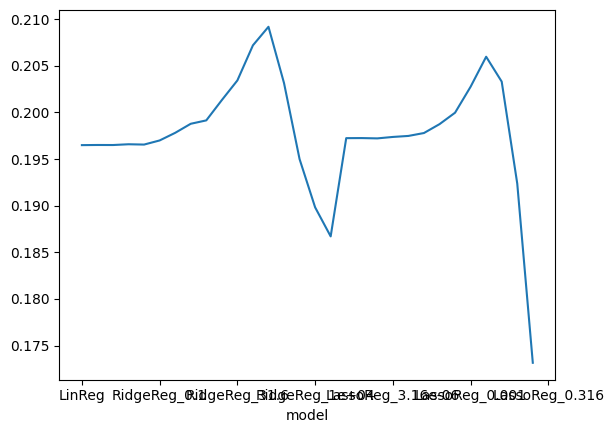

In [80]:
CV.scores.mean().plot()

(<Figure size 600x660 with 1 Axes>, <AxesSubplot: >)

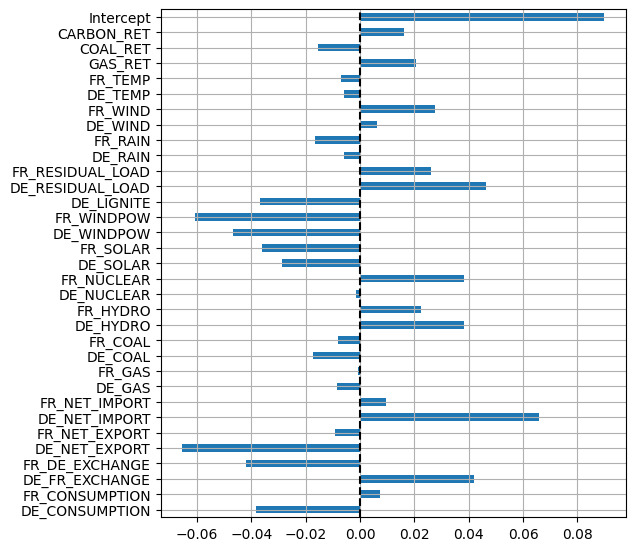

In [75]:
lr = RidgeRegressionModel(alpha=316)
lr.fit(F, y)
lr.plot_coef()

In [45]:
sklearn.model_selection.KFold(n_splits=4, verbosity = -1)

TypeError: __init__() got an unexpected keyword argument 'verbosity'